# Data Management

In [1]:
import numpy as np 
import pandas as pd
import pandas
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline
import seaborn as sns; sns.set()

In [2]:
stroke_data = pd.read_csv('Stroke_Prediction_Dataset.csv')

In [3]:
stroke_data.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,4,0,228.69,36.6,1.0,1
1,51676,0,61.0,0,0,1,5,1,202.21,NaN,2.0,1
2,31112,1,80.0,0,1,1,4,1,105.92,32.5,2.0,1
3,60182,0,49.0,0,0,1,4,0,171.23,34.4,3.0,1
4,1665,0,79.0,1,0,1,5,1,174.12,24.0,2.0,1
5,56669,1,81.0,0,0,1,4,0,186.21,29.0,1.0,1
6,53882,1,74.0,1,1,1,4,1,70.09,27.4,2.0,1
7,10434,0,69.0,0,0,0,4,0,94.39,22.8,2.0,1
8,27419,0,59.0,0,0,1,4,1,76.15,NaN,NaN,1
9,60491,0,78.0,0,0,1,4,0,58.57,24.2,NaN,1


In [4]:
stroke_data.describe()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,3566.000000,5110.000000
mean,36517.829354,0.414286,43.226614,0.097456,0.054012,0.656164,3.495499,0.491977,106.147677,28.893237,1.973079,0.048728
std,21161.721625,0.493044,22.612647,0.296607,0.226063,0.475034,1.278532,0.499985,45.283560,7.854067,0.684719,0.215320
min,67.000000,0.000000,0.080000,0.000000,0.000000,0.000000,1.000000,0.000000,55.120000,10.300000,1.000000,0.000000
25%,17741.250000,0.000000,25.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.245000,23.500000,2.000000,0.000000
50%,36932.000000,0.000000,45.000000,0.000000,0.000000,1.000000,4.000000,0.000000,91.885000,28.100000,2.000000,0.000000
75%,54682.000000,1.000000,61.000000,0.000000,0.000000,1.000000,4.000000,1.000000,114.090000,33.100000,2.000000,0.000000
max,72940.000000,2.000000,82.000000,1.000000,1.000000,1.000000,5.000000,1.000000,271.740000,97.600000,3.000000,1.000000


In [5]:
stroke_data[stroke_data.duplicated() == True]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [6]:
## No duplicated

In [7]:
stroke_data_miss_values =stroke_data.isnull().sum() ## see the Nan values of stroke dataframe

In [8]:
stroke_data_miss_values ## missing values in bmi and smoking status

id                      0
gender                  0
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
residence_type          0
avg_glucose_level       0
bmi                   201
smoking_status       1544
stroke                  0
dtype: int64

In [9]:
stroke_data.smoking_status = stroke_data.smoking_status.fillna('4') # filling the stroke Nan values by 4, on behalf of the unknown
stroke_data.dropna (subset=['bmi'], how='all', inplace = True) 
stroke_data.drop("id", axis=1, inplace=True) # dropped 'id' column because it can cause unwanted correlation.
stroke_data= stroke_data.reset_index(drop=True)

In [10]:
stroke_data.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,4,0,228.69,36.6,1,1
1,1,80.0,0,1,1,4,1,105.92,32.5,2,1
2,0,49.0,0,0,1,4,0,171.23,34.4,3,1
3,0,79.0,1,0,1,5,1,174.12,24.0,2,1
4,1,81.0,0,0,1,4,0,186.21,29.0,1,1
5,1,74.0,1,1,1,4,1,70.09,27.4,2,1
6,0,69.0,0,0,0,4,0,94.39,22.8,2,1
7,0,78.0,0,0,1,4,0,58.57,24.2,4,1
8,0,81.0,1,0,1,4,1,80.43,29.7,2,1
9,0,61.0,0,1,1,2,1,120.46,36.8,3,1


In [11]:
stroke_data.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,0.410063,42.865374,0.091872,0.049501,0.652679,3.486657,0.492768,105.305150,28.893237,0.042575
std,0.492309,22.555115,0.288875,0.216934,0.476167,1.281679,0.499999,44.424341,7.854067,0.201917
min,0.000000,0.080000,0.000000,0.000000,0.000000,1.000000,0.000000,55.120000,10.300000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.070000,23.500000,0.000000
50%,0.000000,44.000000,0.000000,0.000000,1.000000,4.000000,0.000000,91.680000,28.100000,0.000000
75%,1.000000,60.000000,0.000000,0.000000,1.000000,4.000000,1.000000,113.570000,33.100000,0.000000
max,2.000000,82.000000,1.000000,1.000000,1.000000,5.000000,1.000000,271.740000,97.600000,1.000000


In [12]:
#ensure that age, avg_glucose_level and bmi column is float
stroke_data.age = pd.to_numeric(stroke_data.age, downcast='float')
stroke_data.avg_glucose_level = pd.to_numeric(stroke_data.avg_glucose_level, downcast='float')
stroke_data.bmi = pd.to_numeric(stroke_data.bmi, downcast='float')
stroke_data.gender = pd.to_numeric(stroke_data.gender, downcast='float')
stroke_data.ever_married = pd.to_numeric(stroke_data.ever_married, downcast='float')
stroke_data.smoking_status = pd.to_numeric(stroke_data.smoking_status, downcast='float')

# Data exploratory and visualization

## Categorical Variables

### Gender

In [13]:
male = stroke_data[stroke_data['gender'] == 1]
female = stroke_data[stroke_data['gender'] == 0]
others = stroke_data[stroke_data['gender'] == 2]

male_count = male['gender'].count()
female_count = female['gender'].count()
others_count = others['gender'].count()

print('Male :',male_count)
print('Female :',female_count)
print('Others :',others_count)

Male : 2011
Female : 2897
Others : 1


<ipython-input-14-5c2f6711dca2>:2: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  plt.subplots_adjust(wspace = 0.2)


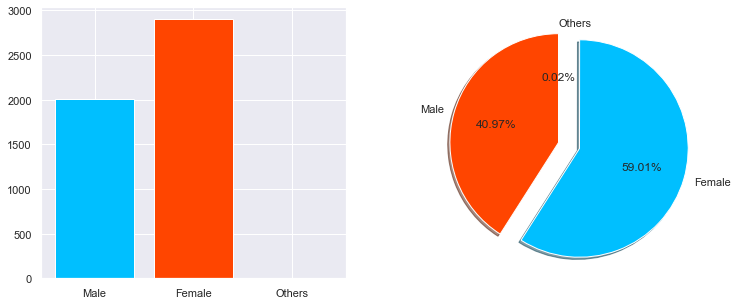

In [14]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (12,5),constrained_layout=True)
plt.subplots_adjust(wspace = 0.2)

ax1.bar(stroke_data.gender.unique(),stroke_data.gender.value_counts(),color = ['orangered','deepskyblue','green'],width = 0.8)
ax1.set_xticks(stroke_data.gender.unique())
ax1.set_xticklabels(('Female','Male','Others'))

ax2.pie([male_count,female_count,others_count], colors=['orangered','deepskyblue','green'], explode=[0,0.2,0], labels = ('Male','Female','Others'),autopct='%1.2f%%',startangle=90,shadow=True, )

plt.show()

### hypertension

In [15]:
no_hypertension = stroke_data[stroke_data['hypertension'] == 0]
has_hypertension = stroke_data[stroke_data['hypertension'] == 1]

no_hypertension_count = no_hypertension['hypertension'].count()
has_hypertension_count = has_hypertension['hypertension'].count()

print("patient doesn't have hypertension:",no_hypertension_count)
print('patient has hypertension :',has_hypertension_count)


patient doesn't have hypertension: 4458
patient has hypertension : 451


<ipython-input-16-98310d6a5f27>:2: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  plt.subplots_adjust(wspace = 0.2)


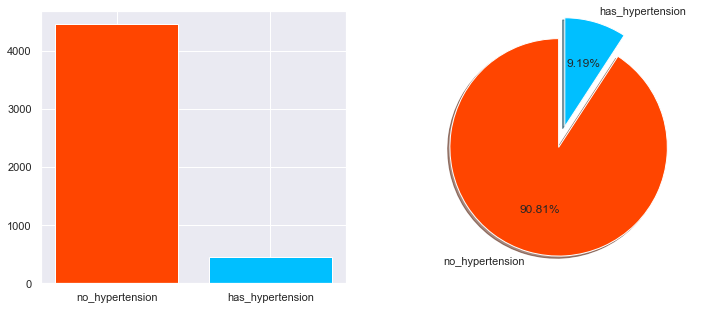

In [16]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (12,5),constrained_layout=True)
plt.subplots_adjust(wspace = 0.2)

ax1.bar(stroke_data.hypertension.unique(),stroke_data.hypertension.value_counts(),color = ['orangered','deepskyblue'],width = 0.8)
ax1.set_xticks(stroke_data.hypertension.unique())
ax1.set_xticklabels(('no_hypertension','has_hypertension'))

ax2.pie([no_hypertension_count,has_hypertension_count], colors=['orangered','deepskyblue'], explode=[0,0.2], labels = ('no_hypertension','has_hypertension'),autopct='%1.2f%%',startangle=90,shadow=True, )

plt.show()

### heart_disease

In [17]:
no_heart_disease = stroke_data[stroke_data['heart_disease'] == 0]
has_heart_disease = stroke_data[stroke_data['heart_disease'] == 1]

no_heart_disease_count = no_heart_disease['heart_disease'].count()
has_heart_disease_count = has_heart_disease['heart_disease'].count()

print("patient doesn't have heart disease:",no_heart_disease_count)
print('patient has heart disease :',has_heart_disease_count)


patient doesn't have heart disease: 4666
patient has heart disease : 243


<ipython-input-18-45fc34667097>:2: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  plt.subplots_adjust(wspace = 0.2)


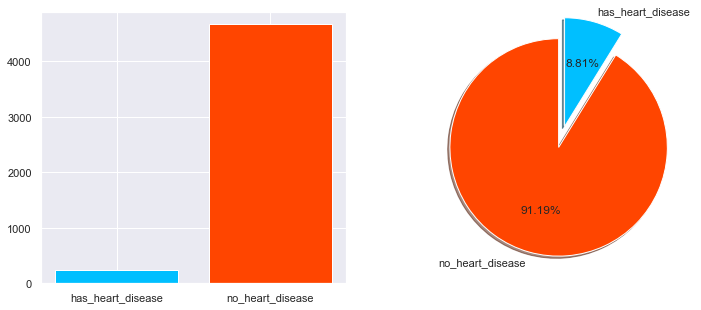

In [18]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (12,5),constrained_layout=True)
plt.subplots_adjust(wspace = 0.2)

ax1.bar(stroke_data.heart_disease.unique(),stroke_data.heart_disease.value_counts(),color = ['orangered','deepskyblue'],width = 0.8)
ax1.set_xticks(stroke_data.heart_disease.unique())
ax1.set_xticklabels(('no_heart_disease','has_heart_disease'))

ax2.pie([no_heart_disease_count,has_hypertension_count], colors=['orangered','deepskyblue'], explode=[0,0.2], labels = ('no_heart_disease','has_heart_disease'),autopct='%1.2f%%',startangle=90,shadow=True, )

plt.show()

### ever_married

In [19]:
unmarried = stroke_data[stroke_data['ever_married'] == 0]
ever_married = stroke_data[stroke_data['ever_married'] == 1]

unmarried_count = unmarried['ever_married'].count()
ever_married_count = ever_married['ever_married'].count()

print("patient unmarried:",unmarried_count)
print('patient ever married:',ever_married_count)


patient unmarried: 1705
patient ever married: 3204


<ipython-input-20-c7fa533d9dd1>:2: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  plt.subplots_adjust(wspace = 0.2)


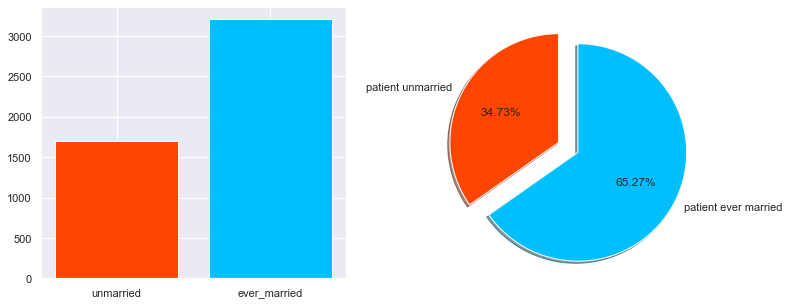

In [20]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (12,5),constrained_layout=True)
plt.subplots_adjust(wspace = 0.2)

ax1.bar(stroke_data.ever_married.unique(),stroke_data.ever_married.value_counts(),color = ['deepskyblue','orangered'],width = 0.8)
ax1.set_xticks(stroke_data.ever_married.unique())
ax1.set_xticklabels(('ever_married','unmarried'))

ax2.pie([unmarried_count,ever_married_count], colors=['orangered','deepskyblue'], explode=[0,0.2], labels = ('patient unmarried','patient ever married'),autopct='%1.2f%%',startangle=90,shadow=True, )

plt.show()

### work_type

In [21]:
work_type_children = stroke_data[stroke_data['work_type'] == 1]
work_type_Govt_jov = stroke_data[stroke_data['work_type'] == 2]
work_type_Never_worked = stroke_data[stroke_data['work_type'] == 3]
work_type_Private = stroke_data[stroke_data['work_type'] == 4]
work_type_Self_employed = stroke_data[stroke_data['work_type'] == 5]

work_type_children_count = work_type_children['work_type'].count()
work_type_Govt_jov_count = work_type_Govt_jov['work_type'].count()
work_type_Never_worked_count = work_type_Never_worked['work_type'].count()
work_type_Private_count = work_type_Private['work_type'].count()
work_type_Self_employed_count = work_type_Self_employed['work_type'].count()

print("children:",work_type_children_count)
print('Govt_jov:',work_type_Govt_jov_count)
print('Never_worked:',work_type_Never_worked_count)
print('Private:',work_type_Private_count)
print('Self_employed:',work_type_Self_employed_count)


children: 671
Govt_jov: 630
Never_worked: 22
Private: 2811
Self_employed: 775


<ipython-input-22-c8138286b200>:2: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  plt.subplots_adjust(wspace = 0.1)


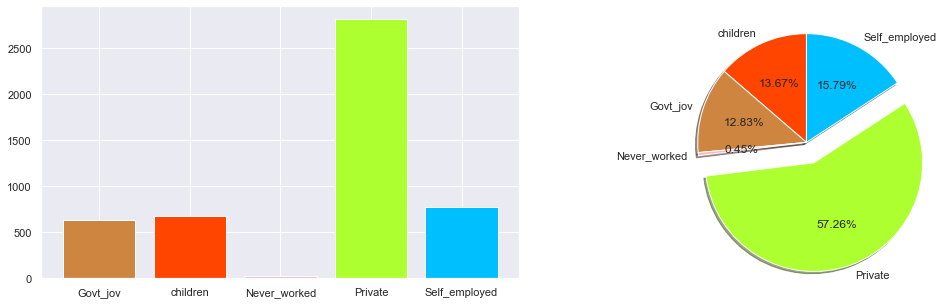

In [22]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (18,5),constrained_layout=True,)
plt.subplots_adjust(wspace = 0.1)

ax1.bar(stroke_data.work_type.unique(),stroke_data.work_type.value_counts(),color = ['greenyellow','deepskyblue','orangered','peru','lightpink'],width = 0.8)
ax1.set_xticks(stroke_data.work_type.unique())
ax1.set_xticklabels(('Private','Self_employed','children','Govt_jov','Never_worked'))

ax2.pie([work_type_children_count,work_type_Govt_jov_count,work_type_Never_worked_count,work_type_Private_count,work_type_Self_employed_count], colors=['orangered','peru','lightpink','greenyellow','deepskyblue']
, explode=[0,0,0,0.2,0], labels = ('children','Govt_jov','Never_worked','Private','Self_employed'),autopct='%1.2f%%',startangle=90,shadow=True, )

plt.show()

### residence_type

In [23]:
rural = stroke_data[stroke_data['residence_type'] == 0]
urban = stroke_data[stroke_data['residence_type'] == 1]

rural_count = rural['residence_type'].count()
urban_count = urban['residence_type'].count()

print("rural_count:",rural_count)
print('urban_count:',urban_count)


rural_count: 2490
urban_count: 2419


<ipython-input-24-c3311fdc77c0>:2: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  plt.subplots_adjust(wspace = 0.1)


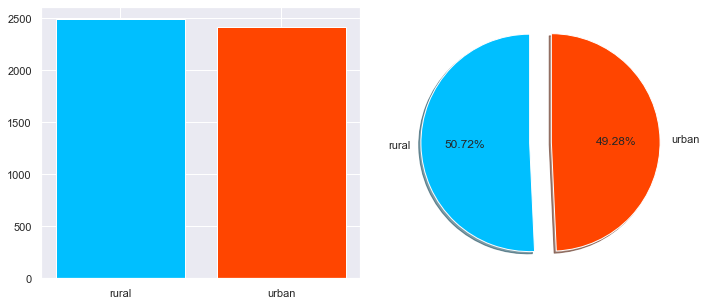

In [24]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (12,5),constrained_layout=True,)
plt.subplots_adjust(wspace = 0.1)

ax1.bar(stroke_data.residence_type.unique(),stroke_data.residence_type.value_counts(),color = ['deepskyblue','orangered'],width = 0.8)
ax1.set_xticks(stroke_data.residence_type.unique())
ax1.set_xticklabels(('rural','urban'))

ax2.pie([rural_count,urban_count], colors=['deepskyblue','orangered']
, explode=[0.2,0], labels = ('rural','urban'),autopct='%1.2f%%',startangle=90,shadow=True, )

plt.show()

### smoking_status

In [25]:
formerly_smoked = stroke_data[stroke_data['smoking_status'] == 1]
never_smoked = stroke_data[stroke_data['smoking_status'] == 2]
smokes = stroke_data[stroke_data['smoking_status'] == 3]
unknown = stroke_data[stroke_data['smoking_status'] == 4]

formerly_smoked_count = formerly_smoked['smoking_status'].count()
never_smoked_count = never_smoked['smoking_status'].count()
smokes_count = smokes['smoking_status'].count()
unknown_count = unknown['smoking_status'].count()

print("formerly_smoked_count:",formerly_smoked_count)
print('never_smoked_count:',never_smoked_count)
print("smokes_count:",smokes_count)
print('unknown_count:',unknown_count)


formerly_smoked_count: 837
never_smoked_count: 1852
smokes_count: 737
unknown_count: 1483


<ipython-input-26-1b6773f4d620>:2: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  plt.subplots_adjust(wspace = 0.05)


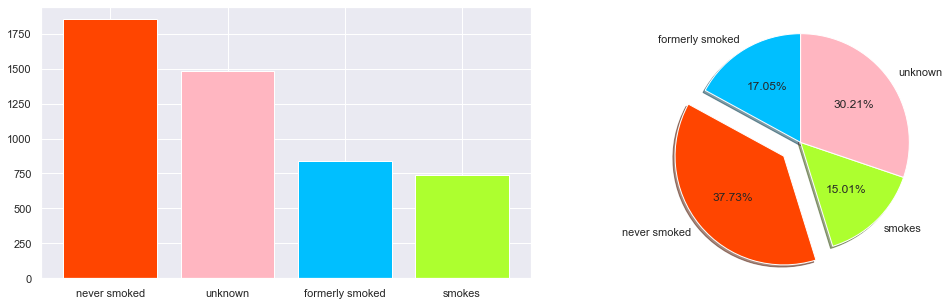

In [26]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (18,5),constrained_layout=True,)
plt.subplots_adjust(wspace = 0.05)

smoking_status_counts =[formerly_smoked_count,never_smoked_count,smokes_count,unknown_count]

ax1.bar(stroke_data.smoking_status.unique(),stroke_data.smoking_status.value_counts(),color = ['orangered','lightpink','deepskyblue','greenyellow'],width = 0.8)
ax1.set_xticks(stroke_data.smoking_status.unique())
ax1.set_xticklabels(('never smoked','unknown','formerly smoked','smokes'))

ax2.pie([formerly_smoked_count,never_smoked_count,smokes_count,unknown_count], colors=['deepskyblue','orangered','greenyellow','lightpink']
, explode=[0,0.2,0,0], labels = ('formerly smoked','never smoked','smokes','unknown'),autopct='%1.2f%%',startangle=90,shadow=True, )

plt.show()

### Numerical Variables

def plot_hist(variable):
    plt.figure(figsize = (12,3))
    plt.hist(stroke_data[variable], bins = 60)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} Distribution with Histogram".format(variable))
    plt.show()

numerical_variables = ['age', 'avg_glucose_level', 'bmi']
for n in numerical_variables:
    plot_hist(n)

Text(0.5, 1.0, 'avg_glucose_level Interval and Counts')

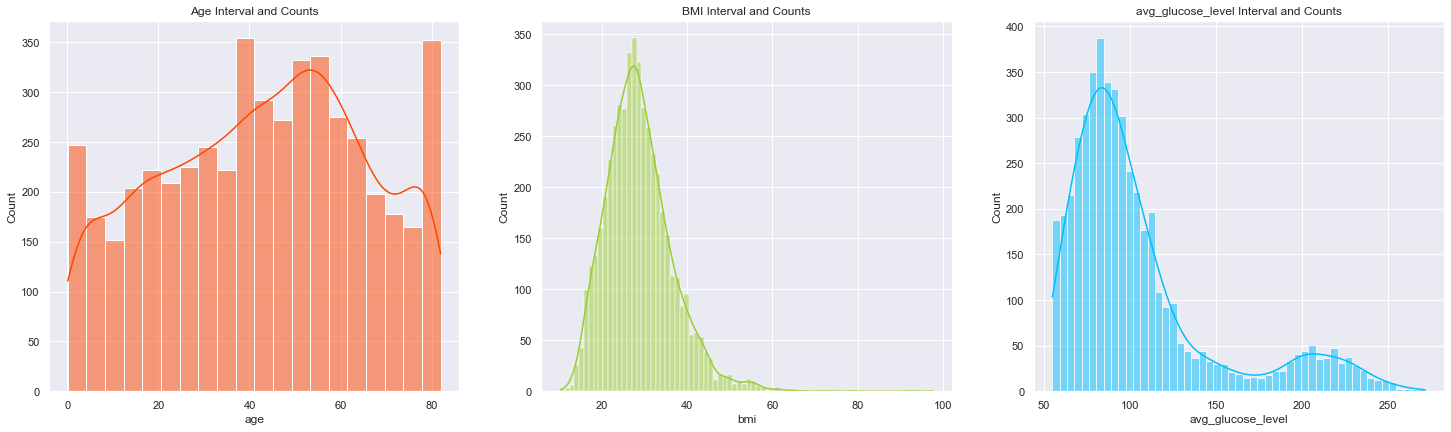

In [27]:
plt.figure(figsize=(25,15))

plt.subplot(2,3,1)
sns.histplot(stroke_data['age'], color = 'orangered', kde = True).set_title('Age Interval and Counts')

plt.subplot(2,3,2)
sns.histplot(stroke_data['bmi'], color = 'yellowgreen', kde = True).set_title('BMI Interval and Counts')

plt.subplot(2,3,3)
sns.histplot(stroke_data['avg_glucose_level'], kde = True, color = 'deepskyblue').set_title('avg_glucose_level Interval and Counts')

<AxesSubplot:xlabel='stroke', ylabel='avg_glucose_level'>

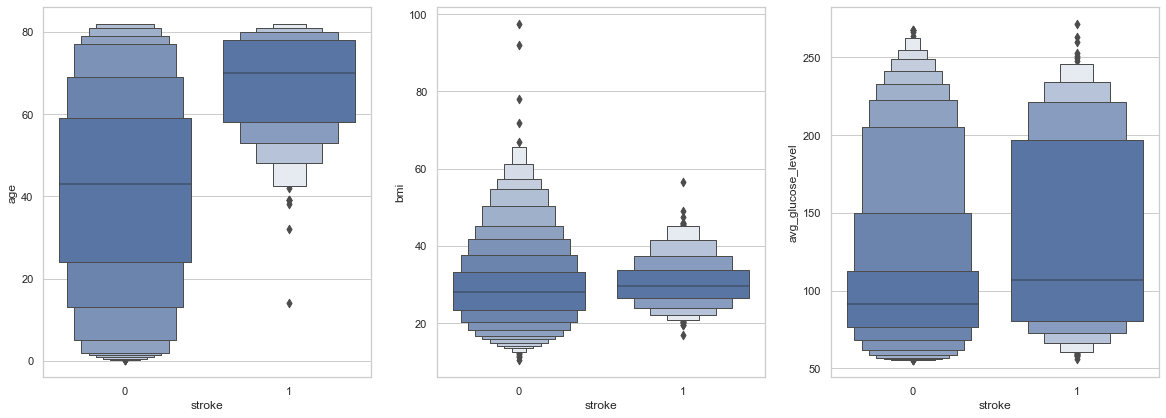

In [28]:
import seaborn as sns
sns.set_theme(style="whitegrid")


plt.figure(figsize=(20,15))

plt.subplot(2,3,1)
sns.boxenplot(x=stroke_data['stroke'], y=stroke_data['age'],
              color="b", 
              scale="linear", data=stroke_data)

plt.subplot(2,3,2)
sns.boxenplot(x=stroke_data['stroke'], y=stroke_data['bmi'],
              color="b", 
              scale="linear", data=stroke_data)

plt.subplot(2,3,3)
sns.boxenplot(x=stroke_data['stroke'], y=stroke_data['avg_glucose_level'],
              color="b", 
              scale="linear", data=stroke_data)

C:\Users\10137\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 83.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\10137\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\10137\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 83.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\10137\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\10137\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 83.0% of the points c

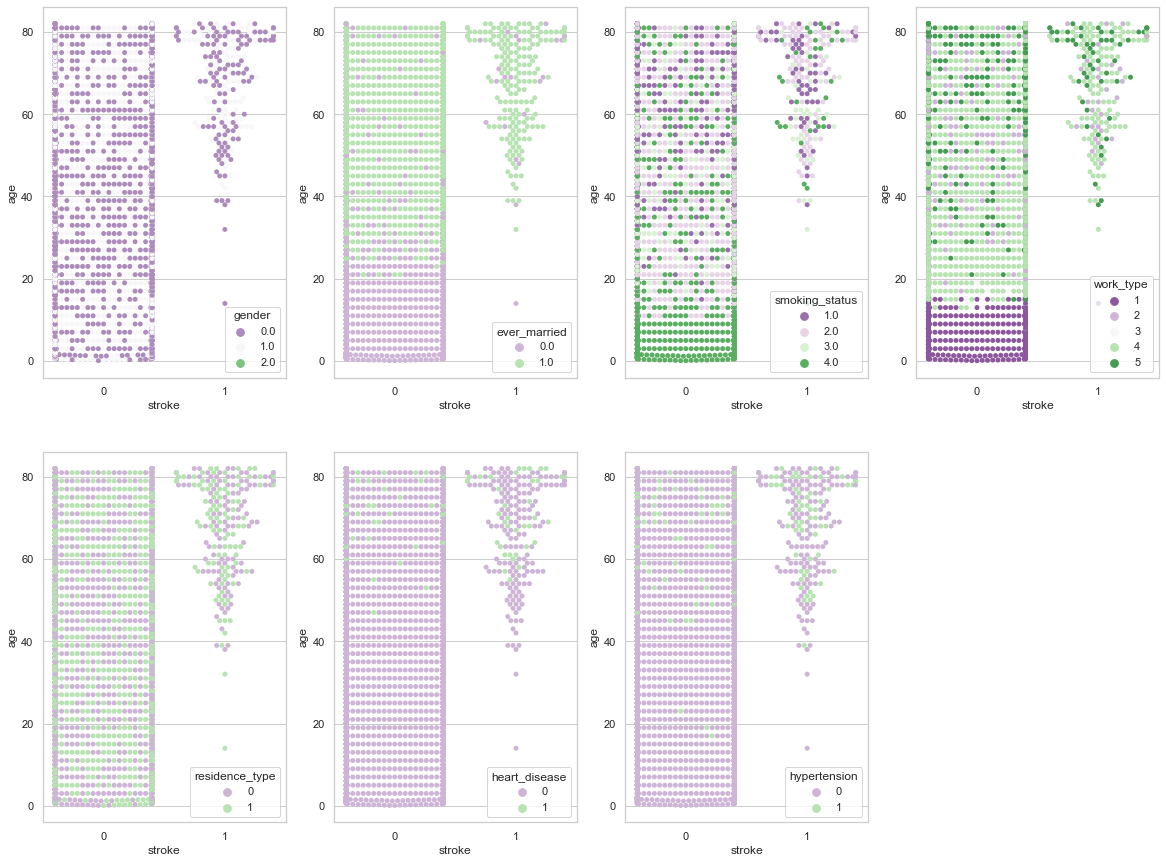

In [29]:
import seaborn as sns
sns.set_theme(style="whitegrid")

plt.figure(figsize=(20,15))

plt.subplot(2,4,1)
sns.swarmplot(x="stroke", y="age",hue="gender", data=stroke_data, palette="PRGn")

plt.subplot(2,4,2)
sns.swarmplot(x="stroke", y="age",hue="ever_married", data=stroke_data, palette="PRGn")

plt.subplot(2,4,3)
sns.swarmplot(x="stroke", y="age",hue="smoking_status", data=stroke_data, palette="PRGn")

plt.subplot(2,4,4)
sns.swarmplot(x="stroke", y="age",hue="work_type", data=stroke_data, palette="PRGn")

plt.subplot(2,4,5)
sns.swarmplot(x="stroke", y="age",hue="residence_type", data=stroke_data, palette="PRGn")

plt.subplot(2,4,6)
sns.swarmplot(x="stroke", y="age",hue="heart_disease", data=stroke_data, palette="PRGn")

plt.subplot(2,4,7)
sns.swarmplot(x="stroke", y="age",hue="hypertension", data=stroke_data, palette="PRGn")


plt.show()

### Basic Data Analysis

#### Gender-stroke

In [30]:
 #Male's stroke rate is higher.

In [31]:
stroke_data[["gender","stroke"]].groupby(["gender"], as_index = False).mean().sort_values(by="stroke",ascending = False)

,gender,stroke
1,1.0,0.044257
0,0.0,0.041422
2,2.0,0.000000


#### Ever Married - Stroke

In [32]:
# stroke rate based on married or not

In [33]:
stroke_data[["ever_married","stroke"]].groupby(["ever_married"], as_index = False).mean().sort_values(by="stroke",ascending = False)

,ever_married,stroke
1,1.0,0.058052
0,0.0,0.013490


#### Work Type - Stroke

In [34]:
# stroke rate based on work_type

In [35]:
stroke_data[["work_type","stroke"]].groupby(["work_type"], as_index = False).mean().sort_values(by="stroke",ascending = False)

,work_type,stroke
4,5,0.068387
3,4,0.045180
1,2,0.044444
0,1,0.001490
2,3,0.000000


#### Residence_type - Stroke

In [36]:
# stroke rate based on residence type

In [37]:
stroke_data[["residence_type","stroke"]].groupby(["residence_type"], as_index = False).mean().sort_values(by="stroke",ascending = False)

,residence_type,stroke
0,0,0.043775
1,1,0.041339


#### smoking_status - Stroke

In [38]:
stroke_data[["smoking_status","stroke"]].groupby(["smoking_status"], as_index = False).mean().sort_values(by="stroke",ascending = False)

,smoking_status,stroke
0,1.0,0.068100
2,3.0,0.052917
1,2.0,0.045356
3,4.0,0.019555


#### hypertension - Stroke

In [39]:
stroke_data[["hypertension","stroke"]].groupby(["hypertension"], as_index = False).mean().sort_values(by="stroke",ascending = False)

,hypertension,stroke
1,1,0.133038
0,0,0.033423


#### heart disease - Stroke

In [40]:
stroke_data[["heart_disease","stroke"]].groupby(["heart_disease"], as_index = False).mean().sort_values(by="stroke",ascending = False)

,heart_disease,stroke
1,1,0.164609
0,0,0.036219


### Correaltion

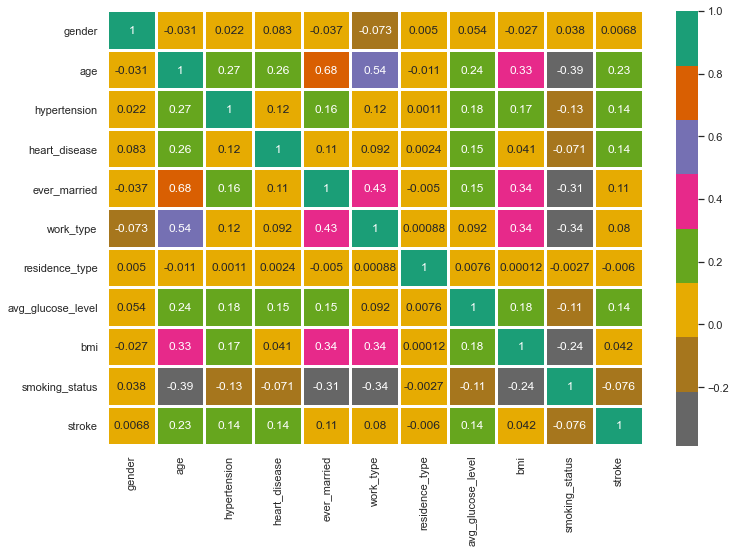

In [41]:
plt.figure(figsize=(12,8)) 
sns.heatmap(stroke_data.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

In [42]:
x = stroke_data.corr()
pd.DataFrame(x['stroke']).sort_values(by='stroke',ascending = False).style.background_gradient(cmap = 'Blues')

,stroke
stroke,1.000000
age,0.232331
hypertension,0.142515
avg_glucose_level,0.138936
heart_disease,0.137938
ever_married,0.105089
work_type,0.079745
bmi,0.042374
gender,0.006757
residence_type,-0.006031


### Pre-processing before Modeling

In [43]:
# Import of standardised modules to transforming data

In [44]:
from sklearn.preprocessing import StandardScaler

stroke_data['avg_glucose_level'] = StandardScaler().fit_transform(stroke_data['avg_glucose_level'].values.reshape(-1,1))
stroke_data['bmi'] = StandardScaler().fit_transform(stroke_data['bmi'].values.reshape(-1,1))
stroke_data['age'] = StandardScaler().fit_transform(stroke_data['bmi'].values.reshape(-1,1))

In [45]:
stroke_data.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,0.981345,0,1,1.0,4,0,2.777699,0.981345,1.0,1
1,1.0,0.459269,0,1,1.0,4,1,0.013842,0.459269,2.0,1
2,0.0,0.701207,0,0,1.0,4,0,1.484131,0.701207,3.0,1
3,0.0,-0.623083,1,0,1.0,5,1,1.549192,-0.623083,2.0,1
4,1.0,0.013595,0,0,1.0,4,0,1.821369,0.013595,1.0,1
5,1.0,-0.190142,1,1,1.0,4,1,-0.792780,-0.190142,2.0,1
6,0.0,-0.775886,0,0,0.0,4,0,-0.245727,-0.775886,2.0,1
7,0.0,-0.597616,0,0,1.0,4,0,-1.052124,-0.597616,4.0,1
8,0.0,0.102730,1,0,1.0,4,1,-0.560001,0.102730,2.0,1
9,0.0,1.006812,0,1,1.0,2,1,0.341173,1.006812,3.0,1


#### downsampling

In [46]:
# The ratio of the number of target samples and normal samples in the original dataset

print("Percentage of normal people:", len(stroke_data[stroke_data.stroke == 0])/len(stroke_data))
print("Percentage of stroke people:", len(stroke_data[stroke_data.stroke == 1])/len(stroke_data))
print("Total number of people in resampled data:",len(stroke_data))

Percentage of normal people: 0.9574251375025463
Percentage of stroke people: 0.04257486249745366
Total number of people in resampled data: 4909


In [47]:
# Number of data points in the stroke class
num_stroke= len(stroke_data[stroke_data.stroke==1]) 
stroke_case= np.array(stroke_data[stroke_data.stroke==1].index) 

#Picking the indices of normal classes
normal_case= stroke_data[stroke_data.stroke==0].index 

#Out of the indices we picked, randomly select "x" number (number_records_stroke)
random_normal_case= np.random.choice(normal_case, num_stroke, replace=False) 
random_normal_case= np.array(random_normal_case)

#Appending the 2 indices
undersample_case= np.concatenate([stroke_case,random_normal_case])

#Under sample dataset
under_sample_data= stroke_data.iloc[undersample_case,:]


In [48]:
under_sample_data

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,0.981345,0,1,1.0,4,0,2.777699,0.981345,1.0,1
1,1.0,0.459269,0,1,1.0,4,1,0.013842,0.459269,2.0,1
2,0.0,0.701207,0,0,1.0,4,0,1.484131,0.701207,3.0,1
3,0.0,-0.623083,1,0,1.0,5,1,1.549192,-0.623083,2.0,1
4,1.0,0.013595,0,0,1.0,4,0,1.821369,0.013595,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
2360,0.0,-1.476231,0,0,0.0,1,0,1.159727,-1.476231,4.0,0
3318,1.0,-0.470280,0,0,0.0,1,0,-0.692600,-0.470280,4.0,0
2810,0.0,0.879476,0,0,0.0,4,0,1.710832,0.879476,2.0,0
736,0.0,1.643490,0,0,1.0,4,0,0.098489,1.643490,2.0,0


In [49]:
print("Percentage of normal people:", len(under_sample_data[under_sample_data.stroke == 0])/len(under_sample_data))
print("Percentage of stroke people:", len(under_sample_data[under_sample_data.stroke == 1])/len(under_sample_data))
print("Total number of people in resampled data:",len(under_sample_data))

Percentage of normal people: 0.5
Percentage of stroke people: 0.5
Total number of people in resampled data: 418


#### upsampling

In [50]:
stroke1_data= stroke_data[stroke_data['stroke'].isin(['1'])] 

# Multiple additions to the number of strokes to form a new data set
stroke1_data_24= pd.DataFrame(np.repeat(stroke1_data.values,22,axis=0))
stroke1_data_24.columns = stroke1_data.columns

In [51]:
up_sample_data= pd.concat([stroke1_data_24,stroke_data],axis=0)

In [52]:
up_sample_data.stroke.value_counts()

print("Percentage of normal people:", len(up_sample_data[up_sample_data.stroke == 0])/len(up_sample_data))
print("Percentage of stroke people:", len(up_sample_data[up_sample_data.stroke == 1])/len(up_sample_data))
print("Total number of people in resampled data:",len(up_sample_data))

Percentage of normal people: 0.49437256758178183
Percentage of stroke people: 0.5056274324182182
Total number of people in resampled data: 9507


In [53]:
up_sample_data.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,0.981345,0.0,1.0,1.0,4.0,0.0,2.777699,0.981345,1.0,1.0
1,1.0,0.981345,0.0,1.0,1.0,4.0,0.0,2.777699,0.981345,1.0,1.0
2,1.0,0.981345,0.0,1.0,1.0,4.0,0.0,2.777699,0.981345,1.0,1.0
3,1.0,0.981345,0.0,1.0,1.0,4.0,0.0,2.777699,0.981345,1.0,1.0
4,1.0,0.981345,0.0,1.0,1.0,4.0,0.0,2.777699,0.981345,1.0,1.0
5,1.0,0.981345,0.0,1.0,1.0,4.0,0.0,2.777699,0.981345,1.0,1.0
6,1.0,0.981345,0.0,1.0,1.0,4.0,0.0,2.777699,0.981345,1.0,1.0
7,1.0,0.981345,0.0,1.0,1.0,4.0,0.0,2.777699,0.981345,1.0,1.0
8,1.0,0.981345,0.0,1.0,1.0,4.0,0.0,2.777699,0.981345,1.0,1.0
9,1.0,0.981345,0.0,1.0,1.0,4.0,0.0,2.777699,0.981345,1.0,1.0


In [54]:
# Export to CSV format for subsequent modelling
up_sample_data.to_csv('up.csv')
under_sample_data.to_csv('down.csv')